## Smart healtcare framework for machine learning & intertpretable prediction of SSI

In [1]:
# pip install pandas pandasgui matplotlib seaborn sci-kit-learn # Make sure you run this cell before the rest, and restart kernel 

In [2]:
# Import neccessary tools for dataset normalization
import warnings
import pandas as pd
from pandasgui import show
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style='darkgrid', rc={'axes.facecolor': '.9', 'grid.color': '.8'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['figure.dpi'] = 100

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

df1 = pd.read_csv("S-Full.CSV") # Load dataset from csv file

In [3]:
df1['SSI_EVENT'].value_counts()

no     156936
yes      1787
Name: SSI_EVENT, dtype: int64

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158723 entries, 0 to 158722
Data columns (total 80 columns):
 #   Column                                          Non-Null Count   Dtype  
---  ------                                          --------------   -----  
 0   REGIONS_NAME                                    158723 non-null  object 
 1   RS_NAME                                         158723 non-null  object 
 2   PROCEDURE_NAME                                  158723 non-null  object 
 3   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')   158723 non-null  int64  
 4   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')     158723 non-null  int64  
 5   TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')  158723 non-null  object 
 6   ENCOUNTER_ID                                    158723 non-null  object 
 7   SUBJECT_ID                                      158723 non-null  object 
 8   ORGANIZATIONAL_UNIT_ID                          158723 non-null  object 
 9   SDL_ID                    

In [5]:
df1.describe()

,"TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')","TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",CSEC_DURATION,SERUM_GLUCOSE_DAY1,SERUM_GLUCOSE_DAY2,ASA_SCORE,PROCEDURE_DURATION,DRAINAGE,PAIN,SWELLING,ERYTHEMA,HEAT,FEVER,INCISION,WOUND,ABSCESS,SINUS,HYPTHEMIA,APNEA,BRADYCARDIA,LETHARGY,COUGH,NAUSEA,VOMITING,DYSURIA,OTHER_EVIDENCE,OTHER
count,158723.000000,158723.000000,15873.000000,8373.000000,5146.000000,158723.000000,158723.000000,660.00000,669.000000,537.000000,362.000000,165.000000,386.000000,205.000000,167.000000,338.000000,22.000000,0.0,29.000000,14.000000,24.000000,28.000000,26.000000,31.000000,16.000000,30.000000,90.000000
mean,2019.683058,6.528462,52.251055,65.281978,91.473572,1.447030,54.381804,0.95000,0.983558,0.970205,0.975138,0.975758,0.976684,0.956098,0.988024,0.970414,0.954545,NaN,0.965517,0.857143,0.916667,0.964286,0.961538,0.903226,0.875000,0.600000,0.655556
std,1.102849,3.305760,82.236396,60.855296,57.224644,0.603797,45.374799,0.21811,0.127265,0.170180,0.155920,0.154269,0.151101,0.205380,0.109105,0.169693,0.213201,NaN,0.185695,0.363137,0.282330,0.188982,0.196116,0.300537,0.341565,0.498273,0.477849
min,2016.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2019.000000,4.000000,6.000000,6.000000,13.000000,1.000000,34.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,2020.000000,7.000000,39.000000,77.000000,100.000000,1.000000,45.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,2021.000000,9.000000,60.000000,110.000000,130.000000,2.000000,60.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2021.000000,12.000000,999.000000,200.000000,200.000000,5.000000,999.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Normalizing the data type of the columns and droping irrelevant columns

In [6]:
df1.iloc[:, 23] = df1.iloc[:, 23].str.replace('[\,]', '', regex=True)
df1.iloc[:, 23] = pd.to_numeric(df1.iloc[:, 23])
# Column 23 (HIEGHT) normalized to float

In [7]:
df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].str.replace('[\,/,]', '', regex=True)
# Column PRE_PROCEDURE_DIAGNOSIS normalized

In [8]:
df1.iloc[:, 24] = df1.iloc[:, 24].str.replace('[\,]', '', regex=True)
df1.iloc[:, 24] = pd.to_numeric(df1.iloc[:, 24])
# Column 24 (WEIGHT) normalized to float

In [9]:
df1.iloc[:, 31] = df1.iloc[:, 31].str.replace('[\,]', '', regex=True)
df1.iloc[:, 31] = pd.to_numeric(df1.iloc[:, 31])
# Column 31 (CORE_TEMPERATURE) normalized to float

In [10]:
# After noticing some of the columns have almost all it value to be NAN
# We have decided to drop all of such columns because it is assumed that we do not have data for such columns

df1.isnull().sum() / df1.shape[0] # Returns the percentage of NAN is each column

n = df1.shape[0] // 2 # Taking half of the amount of the entire dataset

# For a column to remain in the dataset, it is advicable that more than half of it values most not be empty

df1.dropna(axis=1, thresh=n, inplace=True)  # Droping columns with over half of it values as NAN

In [11]:
df1.isnull().sum() / df1.shape[0]

REGIONS_NAME                                      0.000000
RS_NAME                                           0.000000
PROCEDURE_NAME                                    0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')     0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')       0.000000
TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')    0.000000
ENCOUNTER_ID                                      0.000000
SUBJECT_ID                                        0.000000
ORGANIZATIONAL_UNIT_ID                            0.000000
SDL_ID                                            0.000000
FORM_INSTANCE_ID                                  0.000000
LANGUAGE_SHORT_DESC                               0.000000
CREATED_BY                                        0.000000
CREATED_ON                                        0.000000
LOCATION                                          0.000000
PROCEDURE_DATE                                    0.000000
PROCEDURE_NAME_1                                  0.0000

In [12]:
# show(df1)

In [13]:
# Droping irrelevant columns

df1.drop([
    'REGIONS_NAME', 'RS_NAME', 'PROCEDURE_NAME_1', 'LANGUAGE_SHORT_DESC', 'ORGANIZATIONAL_UNIT_ID',
    'FORM_INSTANCE_ID', 'ENCOUNTER_ID', 'SUBJECT_ID', 'SDL_ID', 'CREATED_BY', 'SURGEON_ID',
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'YYYY')", "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MM')",
    "TO_CHAR(V_KSA_UNV_F407.PROCEDURE_DATE,'MONTH')", 'PROCEDURE_DATE', 'CREATED_ON', 'HOSPITAL_ADMISSION_DATE', 
], axis=1, inplace=True)

In [14]:
df1.dtypes

PROCEDURE_NAME                   object
LOCATION                         object
SURVEILLANCE_PERIOD              object
EMERGENCY                        object
PRE_PROCEDURE_DIAGNOSIS          object
HEIGHT                          float64
WEIGHT                          float64
OVERALL_COMPLIANCE               object
HAIR_CLIPPED                     object
ANTIBIOTIC_BEFORE_SURGICAL       object
PROPHYLACTIC_ANTIBIOTIC          object
DISCONTINUATION_PROPHYLACTIC     object
TEMPERATURE_NORMAL               object
MULTIPLE_PROCEDURES              object
LAPAROSCOPE_ENDOSCOPE            object
TRAUMA                           object
WOUND_CLASS                      object
GENERAL_ANESTHESIA               object
ASA_SCORE                         int64
PROCEDURE_DURATION                int64
SSI_EVENT                        object
dtype: object

In [15]:
# show(df1[df1['SSI_EVENT'] == 'yes'])
# show(df1[df1['SSI_EVENT'] == 'no'])

## Handling missing values

In [16]:
df1.isnull().sum()

PROCEDURE_NAME                      0
LOCATION                            0
SURVEILLANCE_PERIOD             22205
EMERGENCY                           0
PRE_PROCEDURE_DIAGNOSIS             4
HEIGHT                          19459
WEIGHT                          76803
OVERALL_COMPLIANCE                  0
HAIR_CLIPPED                    28330
ANTIBIOTIC_BEFORE_SURGICAL       7869
PROPHYLACTIC_ANTIBIOTIC          9615
DISCONTINUATION_PROPHYLACTIC     9120
TEMPERATURE_NORMAL               3310
MULTIPLE_PROCEDURES                 0
LAPAROSCOPE_ENDOSCOPE               0
TRAUMA                              0
WOUND_CLASS                         0
GENERAL_ANESTHESIA                  0
ASA_SCORE                           0
PROCEDURE_DURATION                  0
SSI_EVENT                           0
dtype: int64

In [17]:
# Handling missing values for SURVEILLANCE_PERIOD column

sp_mod = df1['SURVEILLANCE_PERIOD'].mode()[0]  # Taking the mode of the column

df1['SURVEILLANCE_PERIOD'] = df1['SURVEILLANCE_PERIOD'].fillna(value=sp_mod)  # Filling the missing values with the mode

df1['SURVEILLANCE_PERIOD'].isnull().sum()

# df1.loc[df2['SURVEILLANCE_PERIOD'] == df1['SURVEILLANCE_PERIOD'].mode()[0], ['SURVEILLANCE_PERIOD', 'SSI_EVENT']]


0

In [18]:
# Handling missing values for PRE_PROCEDURE_DIAGNOSIS column

ppd_mod = df1['PRE_PROCEDURE_DIAGNOSIS'].mode()[0]

df1.loc[df1['PRE_PROCEDURE_DIAGNOSIS'] == ppd_mod, ['PRE_PROCEDURE_DIAGNOSIS', 'SSI_EVENT']]

df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].fillna(value=ppd_mod)

df1['PRE_PROCEDURE_DIAGNOSIS'].isnull().sum()

0

In [19]:
# Handling missing values for HEIGHT column

h_mn = df1['HEIGHT'].mean()  # Taking the mean of the column and round it to 1 decimal place

h_md = df1['HEIGHT'].median()  # Taking the median of the column

# df2['HEIGHT'].mode()[0] # here, the mode is complicated so it is better left out

df1['HEIGHT'] = df1['HEIGHT'].apply(lambda x: np.random.choice([h_mn, h_md]) if np.isnan(x) or x == 0 else x)
# Filled the missing values for the height column with random values between the mean and median

df1['HEIGHT'] = round(df1['HEIGHT'], 0)

df1['HEIGHT'].isnull().sum()  # Confirming the result

0

In [20]:
# Handling missing values for WEIGHT column

w_mn = df1['WEIGHT'].mean()

w_md = df1['WEIGHT'].median()

w_mod = df1['WEIGHT'].mode()[0]

df1['WEIGHT'] = df1['WEIGHT'].apply(lambda x: np.random.choice([w_mn, w_md, w_mod]) if np.isnan(x) or x == 0 else x)

df1['WEIGHT'] = round(df1['WEIGHT'], 0)

df1['WEIGHT'].isnull().sum()

0

In [21]:
# Handling missing values for HAIR_CLIPPED column

hc_mod = df1['HAIR_CLIPPED'].mode()[0]

df1.loc[df1['HAIR_CLIPPED'] == hc_mod, ['HAIR_CLIPPED', 'SSI_EVENT']]

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].fillna(value=hc_mod)

df1['HAIR_CLIPPED'] = df1['HAIR_CLIPPED'].apply(lambda x: x if x != 'ND' else hc_mod)

df1['HAIR_CLIPPED'].isnull().sum()

0

In [22]:
# Handling missing values for ANTIBIOTIC_BEFORE_SURGICAL column

abs_mod = df1['ANTIBIOTIC_BEFORE_SURGICAL'].mode()[0]

df1.loc[df1['ANTIBIOTIC_BEFORE_SURGICAL'] == abs_mod, ['ANTIBIOTIC_BEFORE_SURGICAL', 'SSI_EVENT']]

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].fillna(value=abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'] = df1['ANTIBIOTIC_BEFORE_SURGICAL'].apply(lambda x: x if x != 'ND' else abs_mod)

df1['ANTIBIOTIC_BEFORE_SURGICAL'].isnull().sum()

0

In [23]:
# Handling missing values for PROPHYLACTIC_ANTIBIOTIC column

pa_mod = df1['PROPHYLACTIC_ANTIBIOTIC'].mode()[0]

df1.loc[df1['PROPHYLACTIC_ANTIBIOTIC'] == pa_mod, ['PROPHYLACTIC_ANTIBIOTIC', 'SSI_EVENT']]

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].fillna(value=pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'] = df1['PROPHYLACTIC_ANTIBIOTIC'].apply(lambda x: x if x != 'ND' else pa_mod)

df1['PROPHYLACTIC_ANTIBIOTIC'].isnull().sum()

0

In [24]:
# Handling missing values for DISCONTINUATION_PROPHYLACTIC column

dp_mod = df1['DISCONTINUATION_PROPHYLACTIC'].mode()[0]

df1.loc[df1['DISCONTINUATION_PROPHYLACTIC'] == dp_mod, ['DISCONTINUATION_PROPHYLACTIC', 'SSI_EVENT']]

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].fillna(value=dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'] = df1['DISCONTINUATION_PROPHYLACTIC'].apply(lambda x: x if x != 'ND' else dp_mod)

df1['DISCONTINUATION_PROPHYLACTIC'].isnull().sum()

0

In [25]:
# Handling missing values for TEMPERATURE_NORMAL column

tn_mod = df1['TEMPERATURE_NORMAL'].mode()[0]

df1.loc[df1['TEMPERATURE_NORMAL'] == tn_mod, ['TEMPERATURE_NORMAL', 'SSI_EVENT']]

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].fillna(value=tn_mod)

df1['TEMPERATURE_NORMAL'] = df1['TEMPERATURE_NORMAL'].apply(lambda x: x if x != 'ND' else tn_mod)

df1['TEMPERATURE_NORMAL'].isnull().sum()

0

In [26]:
mp_mod = df1['MULTIPLE_PROCEDURES'].mode()[0]

df1['MULTIPLE_PROCEDURES'] = df1['MULTIPLE_PROCEDURES'].apply(lambda x: x if x != 'unknown' else mp_mod)

In [27]:
df1.isnull().sum()

PROCEDURE_NAME                  0
LOCATION                        0
SURVEILLANCE_PERIOD             0
EMERGENCY                       0
PRE_PROCEDURE_DIAGNOSIS         0
HEIGHT                          0
WEIGHT                          0
OVERALL_COMPLIANCE              0
HAIR_CLIPPED                    0
ANTIBIOTIC_BEFORE_SURGICAL      0
PROPHYLACTIC_ANTIBIOTIC         0
DISCONTINUATION_PROPHYLACTIC    0
TEMPERATURE_NORMAL              0
MULTIPLE_PROCEDURES             0
LAPAROSCOPE_ENDOSCOPE           0
TRAUMA                          0
WOUND_CLASS                     0
GENERAL_ANESTHESIA              0
ASA_SCORE                       0
PROCEDURE_DURATION              0
SSI_EVENT                       0
dtype: int64

In [28]:
for col in df1.columns:
    print(f"{col} - {len(df1[col].unique())}")

PROCEDURE_NAME - 39
LOCATION - 2
SURVEILLANCE_PERIOD - 2
EMERGENCY - 2
PRE_PROCEDURE_DIAGNOSIS - 83109
HEIGHT - 238
WEIGHT - 294
OVERALL_COMPLIANCE - 2
HAIR_CLIPPED - 2
ANTIBIOTIC_BEFORE_SURGICAL - 2
PROPHYLACTIC_ANTIBIOTIC - 2
DISCONTINUATION_PROPHYLACTIC - 2
TEMPERATURE_NORMAL - 2
MULTIPLE_PROCEDURES - 2
LAPAROSCOPE_ENDOSCOPE - 2
TRAUMA - 2
WOUND_CLASS - 4
GENERAL_ANESTHESIA - 2
ASA_SCORE - 5
PROCEDURE_DURATION - 541
SSI_EVENT - 2


In [29]:
# show(df1)

## ANOMALY DETECTION AND HANDLING

In [30]:
# IQR Function to detect outlier

def anom_det(data):
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    bottom = np.percentile(data, 25) - 1.5 * iqr
    top = np.percentile(data, 75) + 1.5 * iqr
    return bottom, top

In [31]:
# Handling anomaly(outlier) for HEIGHT

h_bottom, h_top = anom_det(df1['HEIGHT'])

df1.drop(df1.loc[((df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['HEIGHT'] < h_bottom) | (df1['HEIGHT'] > h_top), ['HEIGHT']] = df1['HEIGHT'].median()
df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
0,APPY,yes,thirty,Yes,Acut appendix,64.0,151.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
1,APPY,no,thirty,Yes,ACUT APPENDIX,74.0,165.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,60,no
2,APPY,no,ninty,Yes,ACUT APPENDICITIS,52.0,160.0,No,Yes,Yes,Yes,No,Yes,No,No,No,3_Contaminated,Yes,1,60,no
3,APPY,no,thirty,Yes,acute appendicitis,89.0,169.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,2,105,no
4,APPY,no,thirty,Yes,acute appendicitis,36.0,146.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,60,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [32]:
# Handling anomaly (outlier) for WEIGHT

w_bottom, w_top = anom_det(df1['WEIGHT'])

df1.drop(df1.loc[((df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['WEIGHT'] < w_bottom) | (df1['WEIGHT'] > w_top), ['WEIGHT']] = df1['WEIGHT'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
5,APPY,no,thirty,Yes,acute appendicitis,172.0,79.0,No,No,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,70,no
6,APPY,no,thirty,Yes,acute appendicitis,165.0,63.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,63,no
7,APPY,no,thirty,Yes,acute appendicitis,158.0,55.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,90,no
8,APPY,no,thirty,Yes,acute appendicitis,182.0,82.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,50,no
9,APPY,no,thirty,Yes,acute appendicitis,153.0,99.0,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,1,70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [33]:
# # Analyzing PROCEDURE_DURATION column

pd_bottom, pd_top = anom_det(df1['PROCEDURE_DURATION'])

df1.drop(df1.loc[((df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top)) & (df1['SSI_EVENT'] == 'no')].index, inplace=True)
df1.loc[(df1['PROCEDURE_DURATION'] < pd_bottom) | (df1['PROCEDURE_DURATION'] > pd_top), ['PROCEDURE_DURATION']] = df1['PROCEDURE_DURATION'].median()

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
5,APPY,no,thirty,Yes,acute appendicitis,172.0,79.0,No,No,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,70,no
6,APPY,no,thirty,Yes,acute appendicitis,165.0,63.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,63,no
7,APPY,no,thirty,Yes,acute appendicitis,158.0,55.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,90,no
8,APPY,no,thirty,Yes,acute appendicitis,182.0,82.0,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,50,no
9,APPY,no,thirty,Yes,acute appendicitis,153.0,99.0,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,1,70,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158719,CSEC,no,ninty,No,prev cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158720,CSEC,no,ninty,No,previous cs,153.0,103.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,153.0,78.0,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,90,no


In [34]:
# Function to categorize HEIGHT and WEIGHT

def categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 50:
            category.append(0)
        elif i <= 100:
            category.append(1)
        elif i <= 150:
            category.append(2)
        elif i <= 200:
            category.append(3)
        else:
            category.append(4)
    return category

# Function to categorize PROCEDURE_DURATION

def p_categorize(x):
    values_list = list(x.values)
    category = []
    for i in values_list:
        if i <= 60:
            category.append(0)
        elif i <= 120:
            category.append(1)
        elif i <= 180:
            category.append(2)
        elif i <= 240:
            category.append(3)
        elif i <= 300:
            category.append(4)
        elif i <= 360:
            category.append(5)
        else:
            category.append(6)
    return category

In [35]:
# Setting categories for HEIGHT and WEIGHT

df1['HEIGHT'] = categorize(df1['HEIGHT'])

df1['WEIGHT'] = categorize(df1['WEIGHT'])

df1['PROCEDURE_DURATION'] = p_categorize(df1['PROCEDURE_DURATION'])

df1

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,PRE_PROCEDURE_DIAGNOSIS,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT
5,APPY,no,thirty,Yes,acute appendicitis,3,1,No,No,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no
6,APPY,no,thirty,Yes,acute appendicitis,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no
7,APPY,no,thirty,Yes,acute appendicitis,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no
8,APPY,no,thirty,Yes,acute appendicitis,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no
9,APPY,no,thirty,Yes,acute appendicitis,3,1,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,1,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158718,CSEC,no,ninty,No,malposition,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158719,CSEC,no,ninty,No,prev cs,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158720,CSEC,no,ninty,No,previous cs,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no
158721,CSEC,no,ninty,No,diabetic pt with previous cs,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no


In [36]:
df1.reset_index(inplace=True)
df1.drop(['index'], inplace=True, axis=1)

In [37]:
# df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'acut appendix' if 'append' in x.lower() else x)
# df1['PRE_PROCEDURE_DIAGNOSIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'CS' if 'cs' in x.lower() else x)

In [38]:
# df1['PRE_PROCEDURE_DIAGNOSIS'].value_counts()

In [39]:
# show(df1)

In [40]:
# Increasing dimentionality from PRE_PROCEDURE_DIAGNOSIS column and droping duplicates

df1['CANCER_FEVER_or_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(
    lambda x: 'yes' if ('canc' in x.lower()) or ('feve' in x.lower()) or ('diab' in x.lower()) else 'no'
)

# df1['HAS_CANCER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'cancer' in x.lower() else 'no')

# df1['HAS_FEVER'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'fever' in x.lower() else 'no')

# df1['HAS_DIABETIS'] = df1['PRE_PROCEDURE_DIAGNOSIS'].apply(lambda x: 'yes' if 'diabet' in x.lower() else 'no')

# df1.reset_index(inplace=True)

df = df1.drop(['PRE_PROCEDURE_DIAGNOSIS'], axis=1)

# df.drop_duplicates(keep='first', inplace=True) # Droping duplicate data to avoid overfiting

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,APPY,no,thirty,Yes,3,1,No,No,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no,no
1,APPY,no,thirty,Yes,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no,no
2,APPY,no,thirty,Yes,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,1,no,no
3,APPY,no,thirty,Yes,3,1,No,Yes,Yes,Yes,No,Yes,No,No,No,2_Clean_Contaminated,Yes,1,0,no,no
4,APPY,no,thirty,Yes,3,1,No,No,Yes,Yes,No,Yes,No,No,No,1_Clean,Yes,1,1,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115060,CSEC,no,ninty,No,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
115061,CSEC,no,ninty,No,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
115062,CSEC,no,ninty,No,3,2,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,no
115063,CSEC,no,ninty,No,3,1,No,No,Yes,Yes,Yes,Yes,No,No,No,1_Clean,No,1,1,no,yes


In [41]:
df['SSI_EVENT'].value_counts()

no     113278
yes      1787
Name: SSI_EVENT, dtype: int64

In [42]:
# show(df)

## CHANGING COLUMNS TO NUMERIC

In [43]:
# function to creat dummies (numeric values) for dataset

def dummyrize(x):
    dummies = []
    unique_list = list(x.unique())
    values_list = list(x.values)
    if unique_list == ['yes', 'no']:
        unique_list = ['no', 'yes']
    for i in values_list:
        dummies.append(unique_list.index(i))
    return dummies

In [44]:
# Change affected columns

nw = ['PROCEDURE_DURATION', 'ASA_SCORE', 'WEIGHT', 'HEIGHT']
columns_list = df.columns
for i in columns_list:
    if i not in nw:
        df[i] = dummyrize(df[i])

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115060,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115061,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115062,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115063,1,0,1,1,3,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1


In [45]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
count,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.000000,115065.00000,115065.000000
mean,1.793265,0.063755,0.027159,0.383966,2.633242,1.188546,0.537514,0.905462,0.087568,0.085161,0.787833,0.014566,0.010785,0.057993,0.026142,0.540251,0.618868,1.417451,0.116864,0.01553,0.000565
std,3.112628,0.244318,0.162546,0.486352,0.717402,0.408005,0.498593,0.292577,0.282667,0.279122,0.408844,0.119807,0.103291,0.233732,0.159557,0.522971,0.485667,0.554652,0.321260,0.12365,0.023761
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000,0.00000,0.000000
max,36.000000,1.000000,1.000000,1.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.00000,1.000000


## Data preparation

In [46]:
# Get duplicated data points
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")

duplicate

Duplicate Rows :


,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
2,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
6,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
13,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115059,1,0,1,1,3,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115060,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115061,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0
115062,1,0,1,1,3,2,0,0,0,0,1,0,0,0,0,1,1,1,1,0,0


In [47]:
# Dropping duplicated datapoints

df.drop_duplicates(keep='first', inplace=True, ignore_index=True)

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
4,0,0,0,0,3,1,1,1,0,0,1,0,0,0,0,0,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,1,0,1,0,3,2,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
8546,1,0,1,1,3,2,1,1,0,0,1,0,0,0,0,1,1,1,1,0,0
8547,1,0,1,0,3,1,0,0,0,0,1,0,0,0,0,3,1,1,1,0,0
8548,1,0,1,1,3,2,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0


In [48]:
df['SSI_EVENT'].value_counts()

0    7525
1    1025
Name: SSI_EVENT, dtype: int64

In [49]:
df2 = df.drop(['SSI_EVENT'], axis=1)
df3 = df2[df2.duplicated()]

p_list = [1 for i in range(df3.shape[0])]

df3['SSI_EVENT'] = p_list

df3

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,CANCER_FEVER_or_DIABETIS,SSI_EVENT
70,1,0,0,0,3,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1
71,1,0,0,0,3,1,0,1,0,1,1,0,0,0,0,0,1,2,0,0,1
85,1,0,0,1,3,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
87,1,0,0,0,3,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1
106,1,0,0,0,3,1,0,0,1,1,0,0,0,0,0,0,0,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8470,16,0,1,1,3,1,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1
8471,16,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1
8486,16,0,1,0,3,1,1,1,0,0,1,0,0,0,1,1,0,1,1,0,1
8487,16,0,1,0,3,2,1,1,0,0,1,0,0,0,1,1,0,1,0,0,1


In [50]:
print(df2.shape)
df4 = df2.drop_duplicates(keep=False)
print(df4.shape)
df5 = df.loc[df4.index]
df6 = pd.concat([df5, df3], ignore_index=True)
df6

(8550, 20)
(7354, 20)


,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,3,1,1,1,0,0,1,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,3,1,0,1,0,0,0,0,0,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,16,0,1,1,3,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0
7948,16,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0
7949,16,0,1,0,3,1,1,1,0,0,1,0,0,0,1,1,0,1,1,1,0
7950,16,0,1,0,3,2,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0


In [51]:
df6['SSI_EVENT'].value_counts()

0    6927
1    1025
Name: SSI_EVENT, dtype: int64

In [52]:
df = df6.drop_duplicates(keep='first', ignore_index=True)
df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,0,0,0,0,3,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0
3,0,0,0,0,3,1,1,1,0,0,1,0,0,0,0,0,0,2,0,0,0
4,0,0,0,0,3,1,0,1,0,0,0,0,0,1,0,2,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7947,16,0,1,1,3,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0
7948,16,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0
7949,16,0,1,0,3,1,1,1,0,0,1,0,0,0,1,1,0,1,1,1,0
7950,16,0,1,0,3,2,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0


In [53]:
# dataset balancing by making the 'yes' class 50% of the dataset

n = df[df['SSI_EVENT'] == 1].shape[0]  # getting the amount of 'yes' class available in the dataset

total_data = (100 * n) // 50 # Total amount of data required if yes is 55% of the dataset

no_required = total_data - n # amount of no required in the dataset

m = df[df['SSI_EVENT'] == 0].shape[0]  # getting the requried amount of 'no' class needed for the dataset

l = m - no_required # ratio amount of rows to be droped

rows_to_drop = df.query('(SSI_EVENT == 0)').sample(n=l)  # taking random n samples to be droped

df.drop(rows_to_drop.index, inplace=True)
df.reset_index(inplace=True)
df.drop(['index'], axis=1, inplace=True)

df

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
0,0,0,0,0,3,1,0,1,0,0,0,0,0,1,0,2,0,1,0,0,0
1,0,0,0,0,3,1,0,1,0,0,0,0,0,1,0,1,0,2,1,0,0
2,0,0,0,1,3,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0
3,2,0,0,1,3,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0
4,2,0,0,1,3,1,0,1,0,0,1,0,0,0,0,0,0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2045,16,0,1,1,3,1,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0
2046,16,0,1,1,3,1,0,1,0,0,0,0,0,0,0,1,0,1,1,1,0
2047,16,0,1,0,3,1,1,1,0,0,1,0,0,0,1,1,0,1,1,1,0
2048,16,0,1,0,3,2,1,1,0,0,1,0,0,0,1,1,0,1,0,1,0


In [54]:
df['SSI_EVENT'].value_counts()

0    1025
1    1025
Name: SSI_EVENT, dtype: int64

## EDA and FEATURE SELECTION

In [55]:
df.describe()

,PROCEDURE_NAME,LOCATION,SURVEILLANCE_PERIOD,EMERGENCY,HEIGHT,WEIGHT,OVERALL_COMPLIANCE,HAIR_CLIPPED,ANTIBIOTIC_BEFORE_SURGICAL,PROPHYLACTIC_ANTIBIOTIC,DISCONTINUATION_PROPHYLACTIC,TEMPERATURE_NORMAL,MULTIPLE_PROCEDURES,LAPAROSCOPE_ENDOSCOPE,TRAUMA,WOUND_CLASS,GENERAL_ANESTHESIA,ASA_SCORE,PROCEDURE_DURATION,SSI_EVENT,CANCER_FEVER_or_DIABETIS
count,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000,2050.000000
mean,5.047317,0.104878,0.112195,0.407317,2.526341,1.242927,0.372195,0.837561,0.179512,0.204878,0.704878,0.056585,0.079512,0.127805,0.163902,0.716585,0.325854,1.717073,0.277561,0.500000,0.010244
std,6.843093,0.306471,0.315683,0.491455,0.777012,0.492512,0.483508,0.368943,0.383874,0.403711,0.456209,0.231105,0.270603,0.333954,0.370277,0.753821,0.468807,0.884745,0.447905,0.500122,0.100717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.500000,0.000000
75%,8.000000,0.000000,0.000000,1.000000,3.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
max,36.000000,1.000000,1.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050 entries, 0 to 2049
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   PROCEDURE_NAME                2050 non-null   int64
 1   LOCATION                      2050 non-null   int64
 2   SURVEILLANCE_PERIOD           2050 non-null   int64
 3   EMERGENCY                     2050 non-null   int64
 4   HEIGHT                        2050 non-null   int64
 5   WEIGHT                        2050 non-null   int64
 6   OVERALL_COMPLIANCE            2050 non-null   int64
 7   HAIR_CLIPPED                  2050 non-null   int64
 8   ANTIBIOTIC_BEFORE_SURGICAL    2050 non-null   int64
 9   PROPHYLACTIC_ANTIBIOTIC       2050 non-null   int64
 10  DISCONTINUATION_PROPHYLACTIC  2050 non-null   int64
 11  TEMPERATURE_NORMAL            2050 non-null   int64
 12  MULTIPLE_PROCEDURES           2050 non-null   int64
 13  LAPAROSCOPE_ENDOSCOPE         205

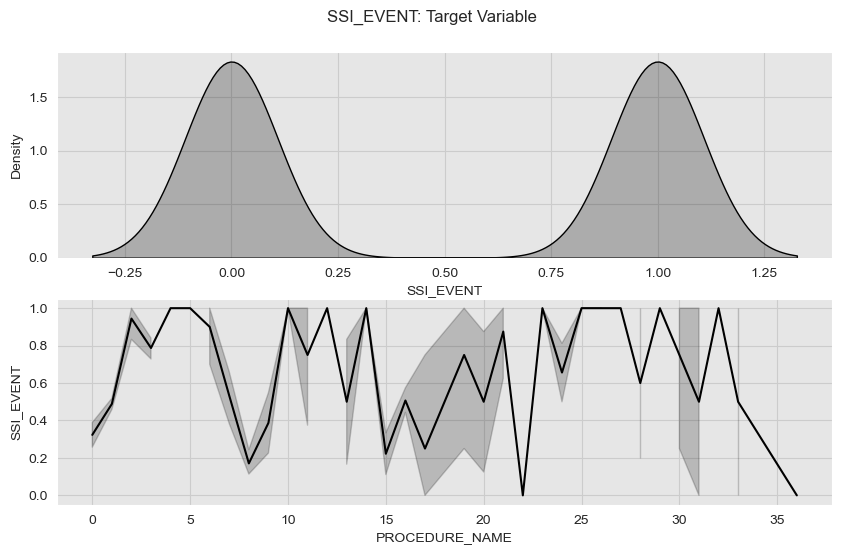

In [57]:
fig, ax = plt.subplots(nrows=2, ncols=1)
sns.kdeplot(x='SSI_EVENT', data=df, fill=True, color='black', ax=ax[0]) # Target variable only
sns.lineplot(x='PROCEDURE_NAME', y='SSI_EVENT', data=df, color='black', ax=ax[1])
fig.suptitle('SSI_EVENT: Target Variable', y=0.95);

<AxesSubplot:xlabel='SSI_EVENT', ylabel='count'>

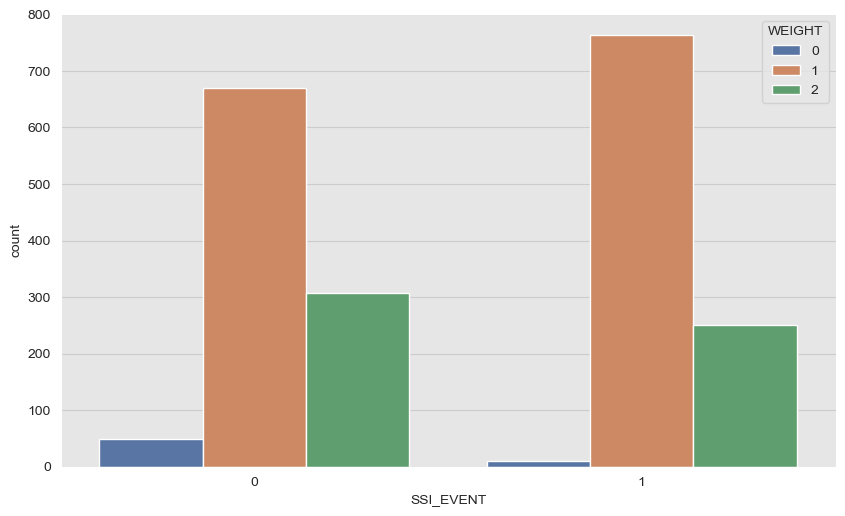

In [58]:
# Analyzing the features

sns.countplot(x='SSI_EVENT', hue='WEIGHT', data=df)

<AxesSubplot:xlabel='SSI_EVENT', ylabel='count'>

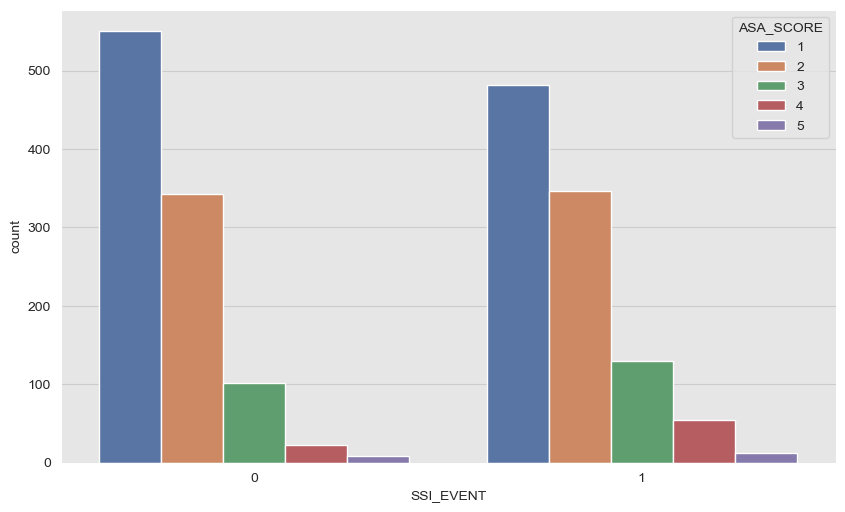

In [59]:
sns.countplot(x='SSI_EVENT', hue='ASA_SCORE', data=df)

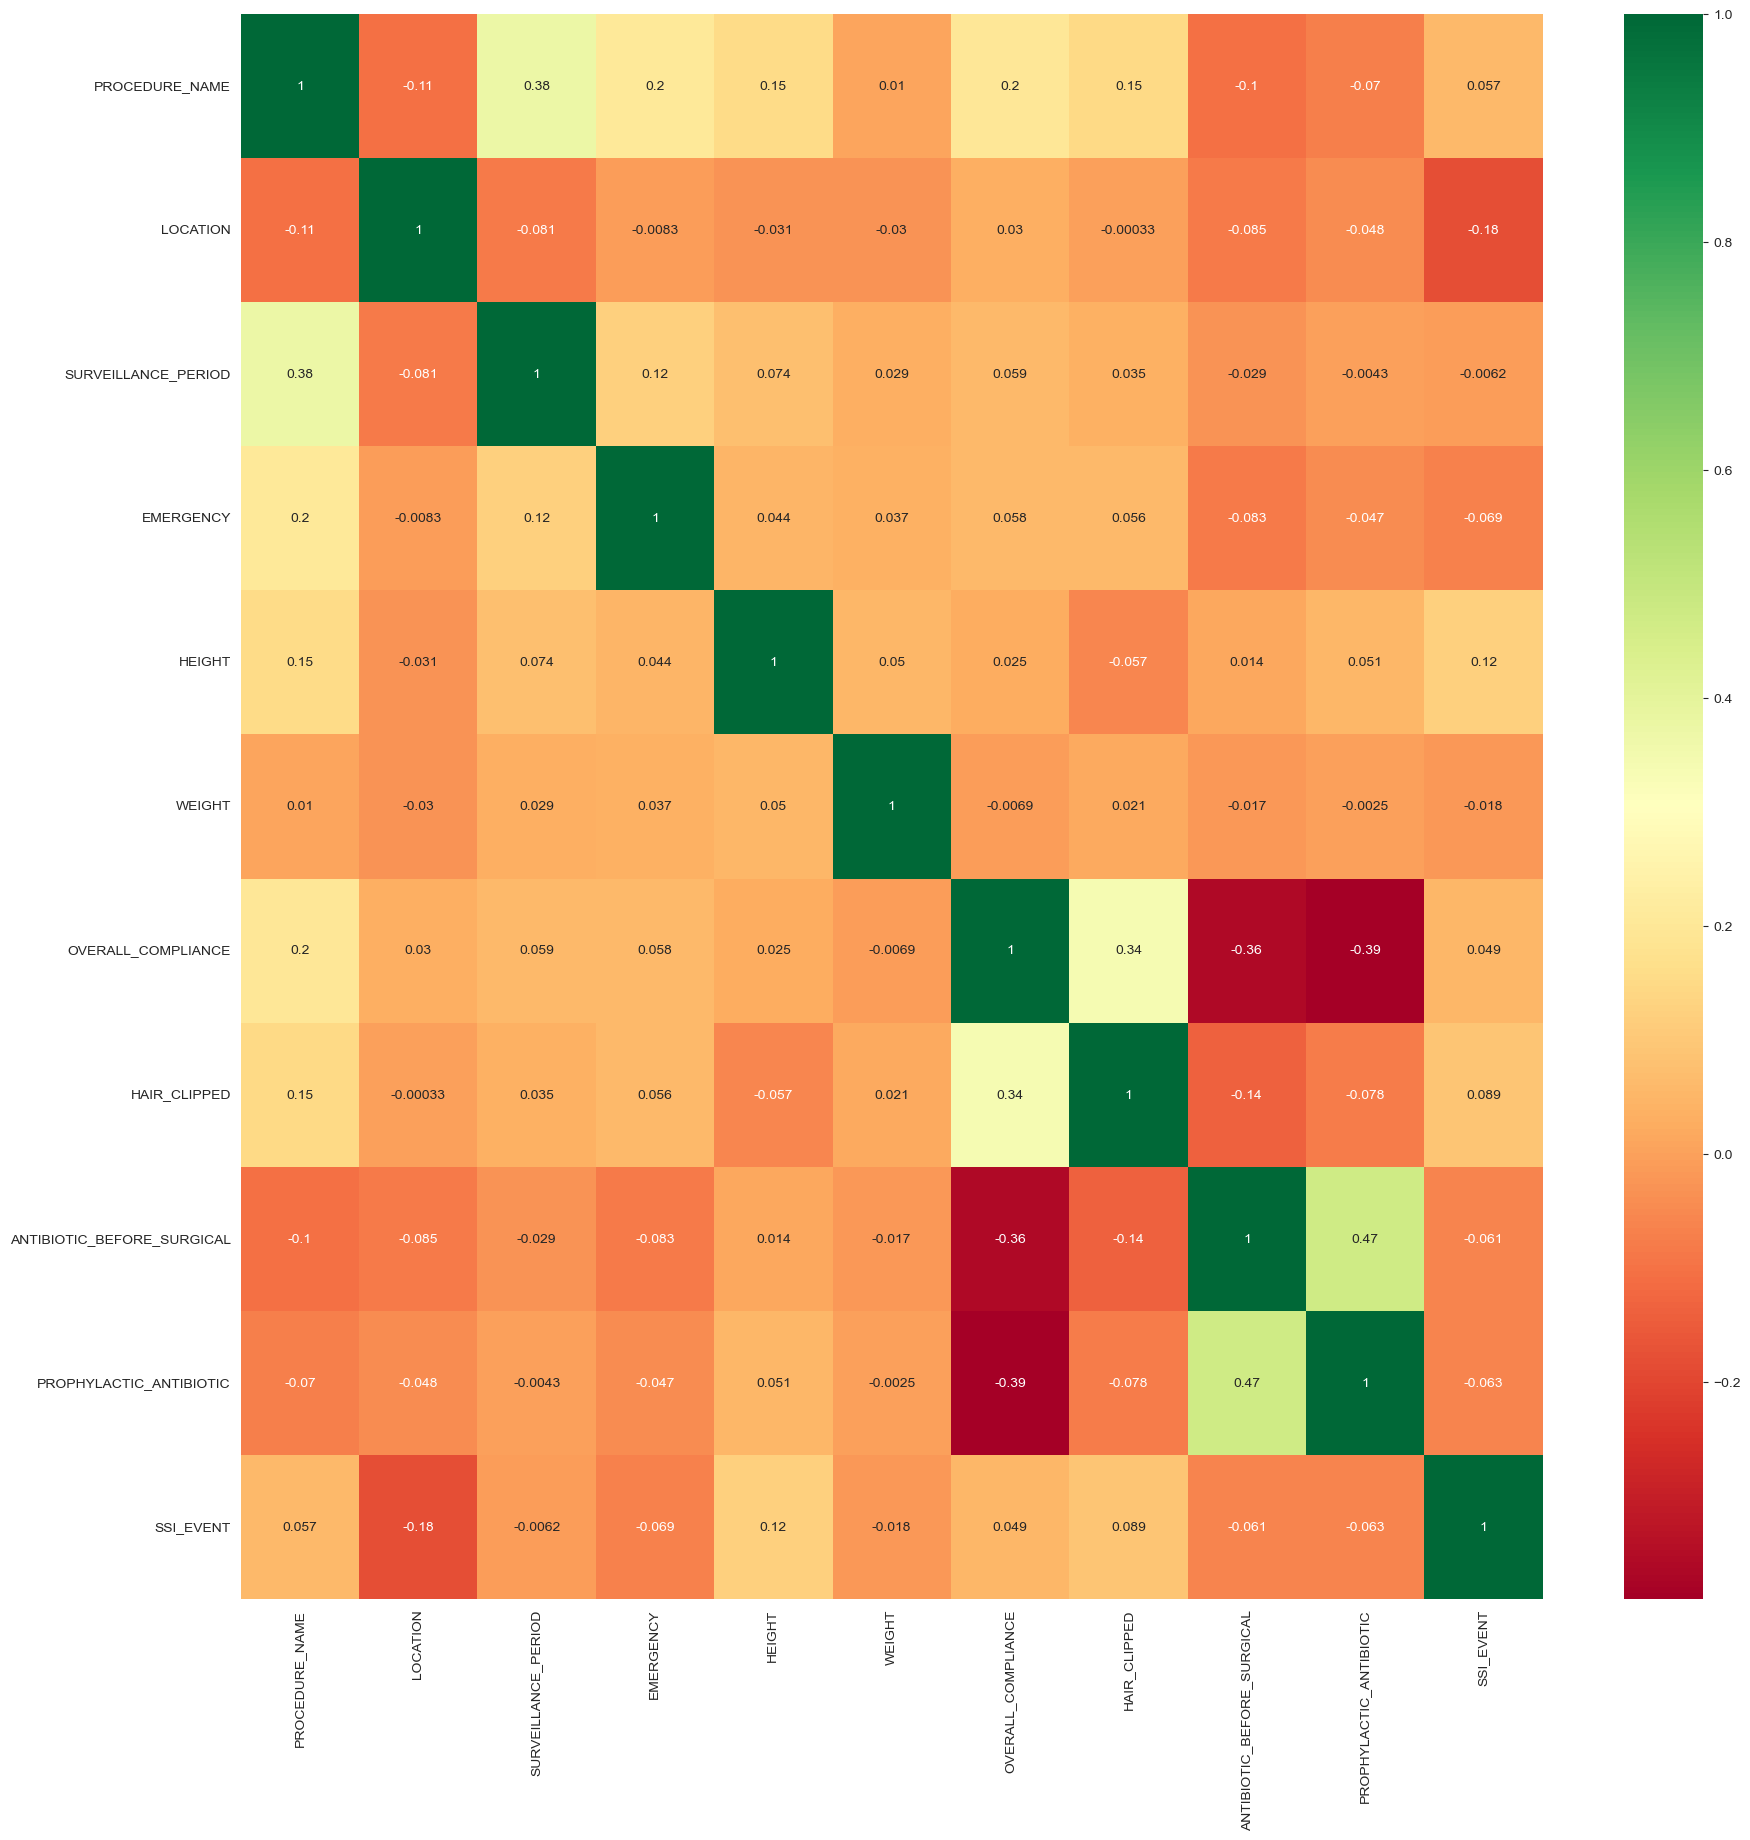

In [64]:
# calculating the correlation matrix to get the relationship between columns

df_corr = df.iloc[:, 0:10].corr()
df_corr["SSI_EVENT"] = df["SSI_EVENT"]
df_corr = df_corr.corr()
t_corr = df_corr.index
plt.figure(figsize=(df.shape[1], df.shape[1]))
graph = sns.heatmap(df[t_corr].corr(), annot=True, cmap='RdYlGn')

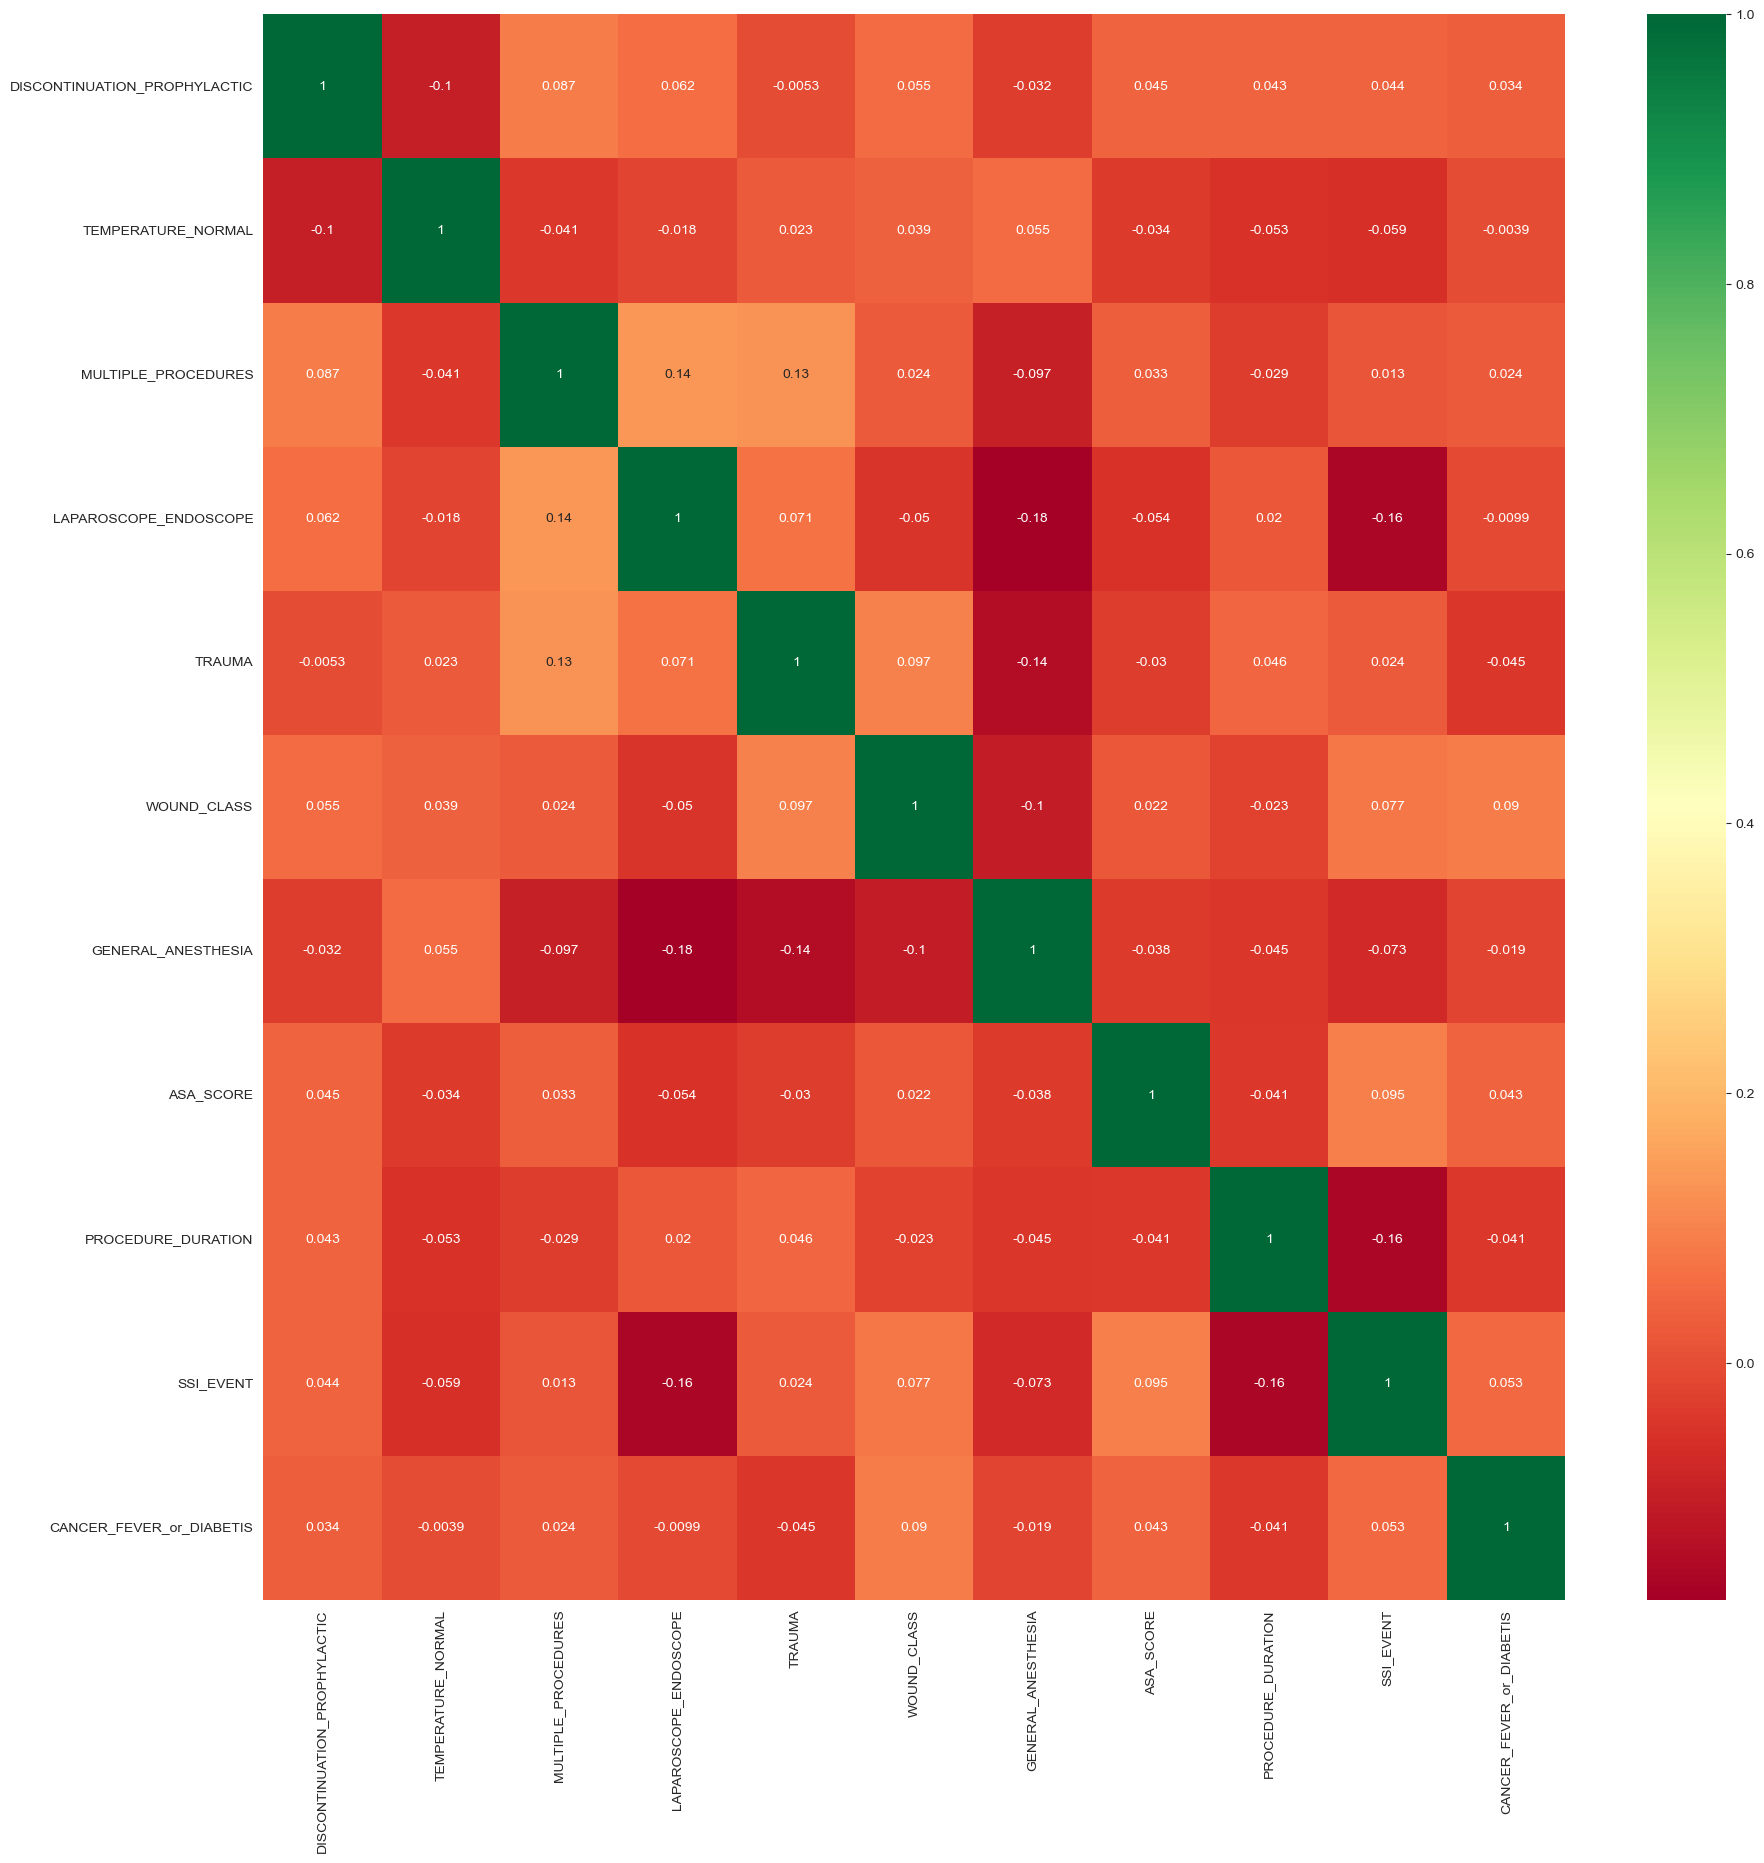

In [65]:
df_corr = df.iloc[:, 10::].corr()
t_corr = df_corr.index
plt.figure(figsize=(df.shape[1], df.shape[1]))
graph = sns.heatmap(df[t_corr].corr(), annot=True, cmap='RdYlGn')

In [37]:
data = pd.read_csv('dataset1.csv')
data = data[['PROCEDURE_NAME', 'LOCATION', 'SURVEILLANCE_PERIOD',
       'EMERGENCY', 'HEIGHT', 'WEIGHT', 'OVERALL_COMPLIANCE', 'HAIR_CLIPPED',
       'ANTIBIOTIC_BEFORE_SURGICAL', 'PROPHYLACTIC_ANTIBIOTIC',
       'DISCONTINUATION_PROPHYLACTIC', 'TEMPERATURE_NORMAL',
       'MULTIPLE_PROCEDURES', 'LAPAROSCOPE_ENDOSCOPE', 'TRAUMA', 'WOUND_CLASS',
       'GENERAL_ANESTHESIA', 'ASA_SCORE', 'PROCEDURE_DURATION', 'SSI_EVENT',
       'CANCER_FEVER_or_DIABETIS']]

# data = df[df.columns]
data
data1 = data.drop('SSI_EVENT', axis=1)
data1 = data1.values
data1

array([[ 0,  0,  0, ...,  2,  1,  0],
       [ 2,  0,  0, ...,  1,  0,  0],
       [ 2,  0,  0, ...,  3,  1,  0],
       ...,
       [19,  0,  1, ...,  2,  1,  0],
       [16,  0,  1, ...,  1,  1,  0],
       [20,  0,  0, ...,  1,  0,  0]], dtype=int64)

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
X_scaled = scaler.transform(data1)

In [70]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3, random_state=5)

pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)
print(sum(pca.explained_variance_ratio_ * 100))
pca.explained_variance_ratio_ * 100

29.426025811638624


array([13.32040567,  9.54203784,  6.5635823 ])

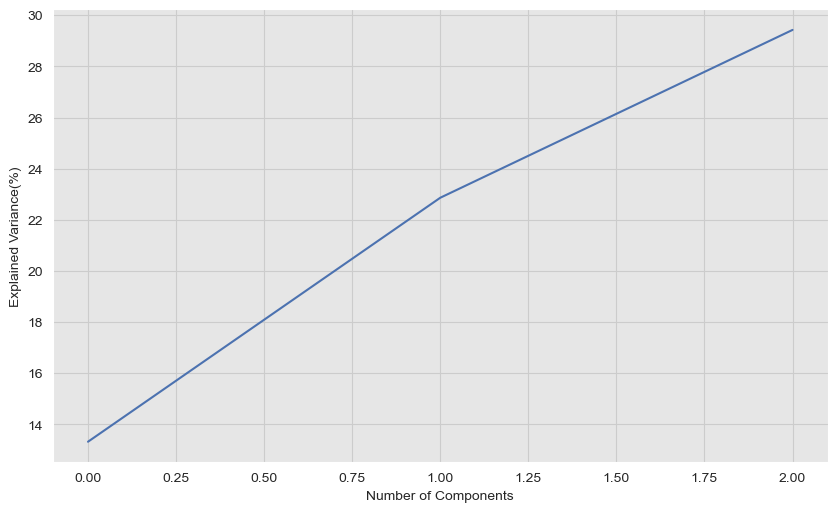

In [66]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance(%)")
plt.show()

In [61]:
# data.to_csv('dataset2.csv')

## MODELLING

In [3]:
from sklearn import model_selection as ms
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import partial_dependence, PartialDependenceDisplay

In [67]:
# x = data.drop(['SSI_EVENT'], axis=1)
x = pca_data
y = data['SSI_EVENT']
# Split dataset into train and test
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.20, random_state=5)

In [60]:
models_list = []
models_list.append(('LR', LogisticRegression(random_state=1)))
models_list.append(('DTC', DecisionTreeClassifier(random_state=1)))
models_list.append(('KNN', KNeighborsClassifier()))
models_list.append(('GNB', GaussianNB()))
models_list.append(('SVM', SVC(kernel='rbf', gamma='auto', random_state=1)))
models_list.append(('RF', RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)))

In [68]:
models = []
outcomes = []

for name, model in models_list:
    kfold = ms.KFold(random_state=5, n_splits=10, shuffle=True)
    cross_val = ms.cross_val_score(model, X_train, y_train, scoring='accuracy', cv=kfold)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    outcomes.append(cross_val)
    models.append(name)
    print(f"{name}: {cross_val.mean()} - {cross_val.std()}")
    print(f"accuracy: {accuracy_score(y_test, pred)}")
    combine = pd.DataFrame(dict(actual=y_test, prediction=pred))
    print(' ')
    print('confusion matrix')
    print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
    print(' ')
    print('classification report')
    print(classification_report(y_test, pred))
    print(' ')
    print('------------------------------------------------------------------')
    print(' ')

LR: 0.58330007390983 - 0.031693602239937994
accuracy: 0.5703883495145631
 
confusion matrix
prediction    0    1
actual              
0           114  100
1            77  121
 
classification report
              precision    recall  f1-score   support

           0       0.60      0.53      0.56       214
           1       0.55      0.61      0.58       198

    accuracy                           0.57       412
   macro avg       0.57      0.57      0.57       412
weighted avg       0.57      0.57      0.57       412

 
------------------------------------------------------------------
 
DTC: 0.5358647450110865 - 0.0273147986390008
accuracy: 0.5679611650485437
 
confusion matrix
prediction    0    1
actual              
0           117   97
1            81  117
 
classification report
              precision    recall  f1-score   support

           0       0.59      0.55      0.57       214
           1       0.55      0.59      0.57       198

    accuracy                         

accuracy: 0.6043689320388349
 
confusion matrix
prediction    0    1
actual              
0           128   86
1            77  121
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.62      0.60      0.61       214
           1       0.58      0.61      0.60       198

    accuracy                           0.60       412
   macro avg       0.60      0.60      0.60       412
weighted avg       0.61      0.60      0.60       412

------------------------------------------------------------------


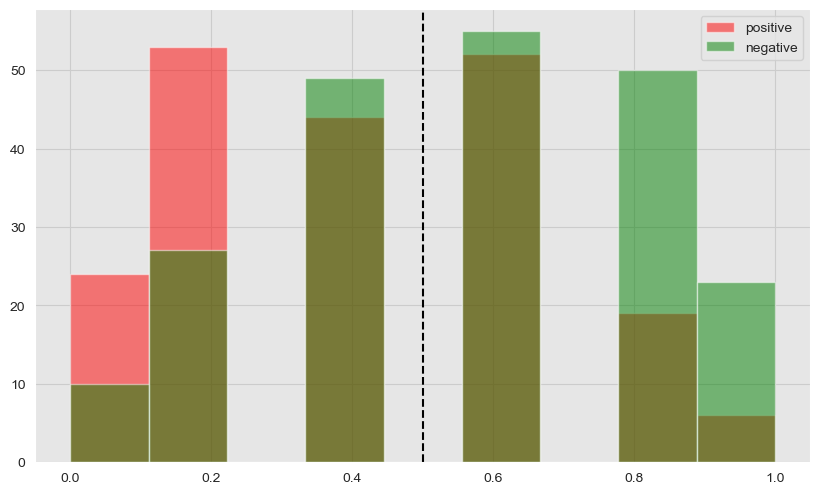

In [69]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train, y_train)
kn_pred = kn.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, kn_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=kn_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, kn_pred))
print('------------------------------------------------------------------')
y_probs = kn.predict_proba(X_test)[:,0]
ths = np.linspace(0,1,20)
sensitivity = [recall_score(y_test, y_probs >= t) for t in ths]
specitivity = [precision_score(y_test, y_probs >= t) for t in ths]
# plt.plot(ths, sensitivity, label='sensitivity')
# plt.plot(ths, specitivity, label='specitivity')
# plt.legend()
# Specify range to ensure both groups show up the same width.
bins = np.linspace(0,1,10)

# Show distributions of estimated probabilities for the two classes.
plt.hist(y_probs[y_test == 1], alpha=0.5, color='red', label='positive', bins=bins)
plt.hist(y_probs[y_test == 0], alpha=0.5, color='green', label='negative', bins=bins)

# Show the threshold.
plt.axvline(0.5, c='black', ls='dashed')

# Add labels
plt.legend()

# threshold=0.5
# cm = confusion_matrix(y_test, kn_pred)
# predicted_class=np.zeros(kn_pred.shape)
# predicted_class[kn_pred>threshold]=1
# sensitivity = cm[0,0]/(cm[0,0]+cm[0,1])
# print('Sensitivity : ', sensitivity )

# specificity = cm[1,1]/(cm[1,0]+cm[1,1])
# print('Specificity : ', specificity)

In [18]:
svc = SVC(kernel='rbf', gamma='auto', random_state=1, probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, svc_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=svc_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, svc_pred))
print('------------------------------------------------------------------')

accuracy: 0.7354368932038835
 
confusion matrix
prediction    0    1
actual              
0           147   67
1            42  156
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.78      0.69      0.73       214
           1       0.70      0.79      0.74       198

    accuracy                           0.74       412
   macro avg       0.74      0.74      0.74       412
weighted avg       0.74      0.74      0.74       412

------------------------------------------------------------------


accuracy: 0.7451456310679612
 
confusion matrix
prediction    0    1
actual              
0           154   60
1            45  153
 
classification report
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.72      0.75       214
           1       0.72      0.77      0.74       198

    accuracy                           0.75       412
   macro avg       0.75      0.75      0.75       412
weighted avg       0.75      0.75      0.75       412

------------------------------------------------------------------


<AxesSubplot:>

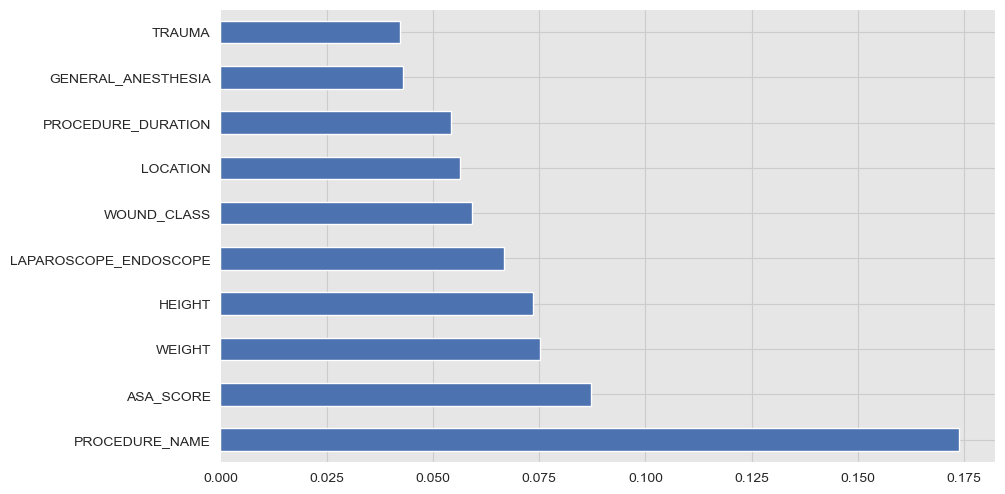

In [19]:
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
print(f"accuracy: {accuracy_score(y_test, rf_pred)}")
combine = pd.DataFrame(dict(actual=y_test, prediction=rf_pred))
print(' ')
print('confusion matrix')
print(pd.crosstab(index=combine['actual'], columns=combine['prediction']))
print(' ')
print('classification report')
print('------------------------------------------------------------------')
print(classification_report(y_test, rf_pred))
print('------------------------------------------------------------------')

# Plot the feature importance
fi = pd.Series(rf.feature_importances_, index=X_test.columns)
fi.nlargest(10).plot(kind='barh')

In [20]:
# Compute the permutation importance for each model

from sklearn.inspection import permutation_importance

kn_pi = permutation_importance(
    estimator=kn,
    X=X_train,
    y=y_train,
    n_repeats=10
)

rf_pi = permutation_importance(
    estimator=rf,
    X=X_train,
    y=y_train,
    n_repeats=10
)

kn_perm_sorted_idx = kn_pi.importances_mean.argsort()[::-1]
rf_perm_sorted_idx = rf_pi.importances_mean.argsort()[::-1]

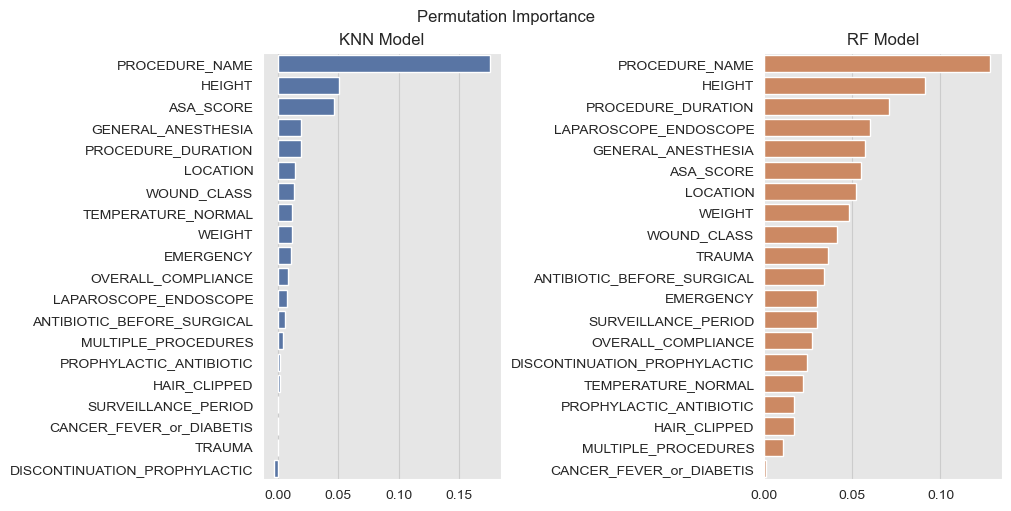

In [21]:
# Plot the permutaion importance

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5), constrained_layout=True)

sns.barplot(
    x=kn_pi.importances_mean[kn_perm_sorted_idx],
    y=X_train.columns[kn_perm_sorted_idx],
    orient='h',
    color=sns_c[0],
    ax=ax[0]
)
ax[0].set(title='KNN Model');

sns.barplot(
    x=rf_pi.importances_mean[rf_perm_sorted_idx],
    y=X_train.columns[rf_perm_sorted_idx],
    orient='h',
    color=sns_c[1],
    ax=ax[1]
)
ax[1].set(title='RF Model')

fig.suptitle('Permutation Importance');

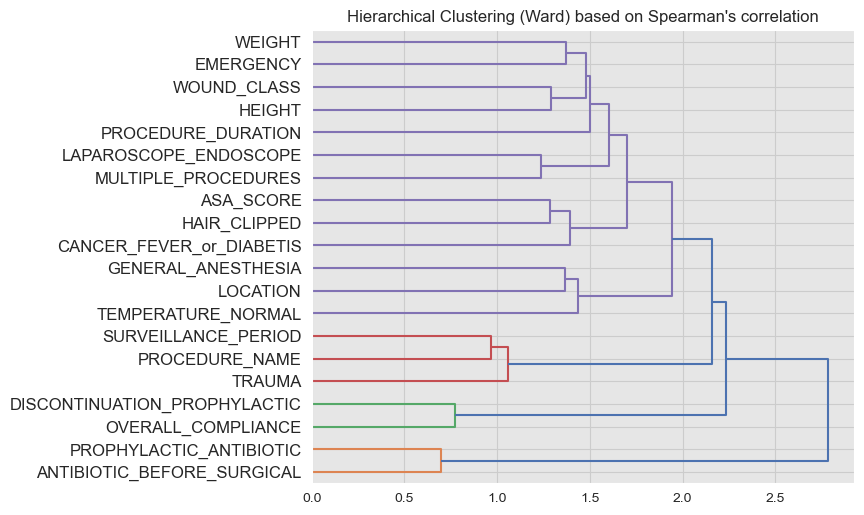

In [22]:
# Plot the hierarchy of the correlation in the features

from scipy.stats import spearmanr
from scipy.cluster import hierarchy

corr = spearmanr(a=X_train).correlation
corr_linkage = hierarchy.ward(y=corr)

fig, ax = plt.subplots(figsize=(7, 6))
dendro = hierarchy.dendrogram(
    Z=corr_linkage,
    labels=X_train.columns, 
    orientation='right',
    ax=ax
)

ax.set(title="Hierarchical Clustering (Ward) based on Spearman's correlation");

In [23]:
import shap
shap.initjs()
 
# Get the model explainer object
knn_explainer = shap.KernelExplainer(kn.predict, X_test)

# Get shap values for the test data observation
knn_shap_values = knn_explainer.shap_values(X_test, nsamples=100)

# Get the model explainer object for RF model
rf_explainer = shap.KernelExplainer(kn.predict, X_test)

# Get shap values for the test data observation for RF model
rf_shap_values = rf_explainer.shap_values(X_test, nsamples=100)

Using 412 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/412 [00:00<?, ?it/s]

Using 412 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/412 [00:00<?, ?it/s]

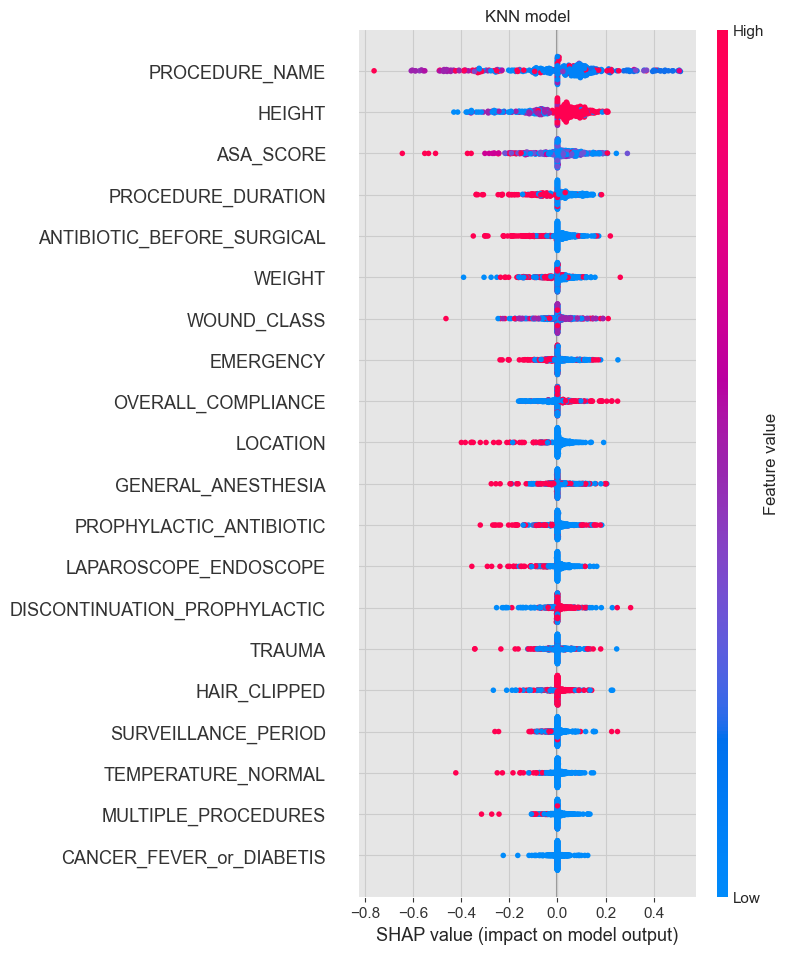

In [24]:
# Plot the shap summary graph for KNN model
shap.summary_plot(knn_shap_values, X_test, show=False)
plt.title("KNN model")
plt.show()

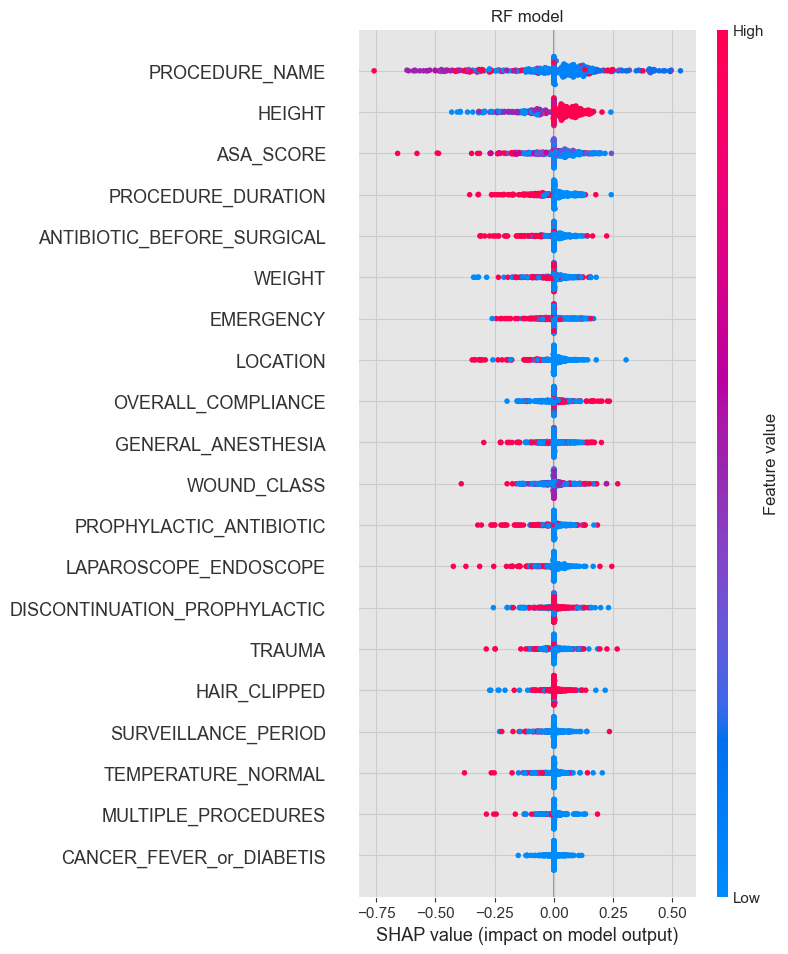

In [25]:
# Plot the shap summary graph for RF model
shap.summary_plot(rf_shap_values, X_test, show=False)
plt.title("RF model")
plt.show()

In [26]:
prob = [0 for i in range(len(y_test))]
kn_prob = kn.predict_proba(X_test)
rf_prob = rf.predict_proba(X_test)
svc_prob = svc.predict_proba(X_test)

kn_prob = kn_prob[:, 1]
rf_prob = rf_prob[:, 1]
svc_prob = svc_prob[:, 1]

auc = round(roc_auc_score(y_test, prob), 2)
kn_auc = round(roc_auc_score(y_test, kn_prob), 2)
rf_auc = round(roc_auc_score(y_test, rf_prob), 2)
svc_auc = round(roc_auc_score(y_test, svc_prob), 2)

print(f'Prediction chance at random: AUCROC = {auc}')
print(f'KNN AUCROC = {kn_auc}')
print(f'RF AUCROC = {rf_auc}')
print(f'SVC AUCROC = {svc_auc}')

Prediction chance at random: AUCROC = 0.5
KNN AUCROC = 0.76
RF AUCROC = 0.81
SVC AUCROC = 0.82


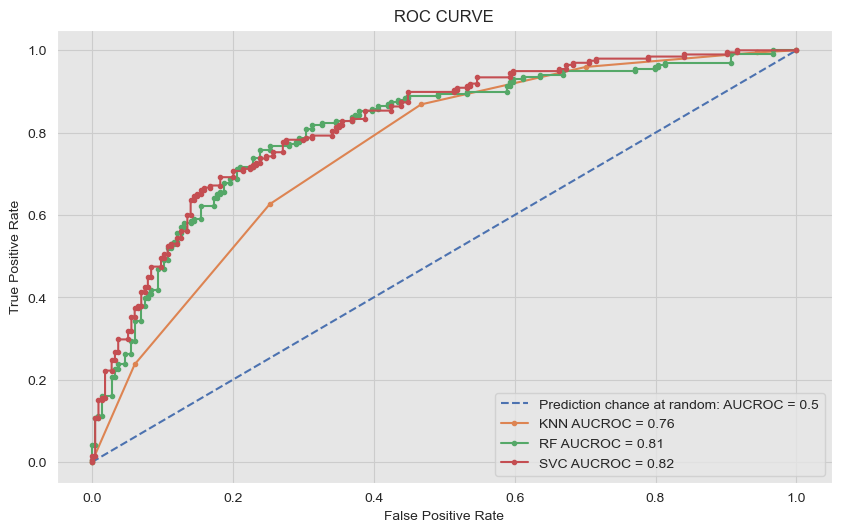

In [27]:
fpr, tpr, i = roc_curve(y_test, prob)
kn_fpr, kn_tpr, kn_i = roc_curve(y_test, kn_prob)
rf_fpr, rf_tpr, rf_i = roc_curve(y_test, rf_prob)
svc_fpr, svc_tpr, svc_i = roc_curve(y_test, svc_prob)

plt.plot(fpr, tpr, linestyle='--', label=f'Prediction chance at random: AUCROC = {auc}')
plt.plot(kn_fpr, kn_tpr, marker='.', label=f'KNN AUCROC = {kn_auc}')
plt.plot(rf_fpr, rf_tpr, marker='.', label=f'RF AUCROC = {rf_auc}')
plt.plot(svc_fpr, svc_tpr, marker='.', label=f'SVC AUCROC = {svc_auc}')
plt.title('ROC CURVE')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## ANN MODEL

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [19]:
model = Sequential()
# model.add(Dense(64, input_dim=len(X_train.columns), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(1, activation="sigmoid"))
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.30)

Epoch 1/20
36/36 [==============================] - 1s 9ms/step - loss: 0.7674 - accuracy: 0.5087 - val_loss: 0.6753 - val_accuracy: 0.5263
Epoch 2/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6765 - accuracy: 0.5861 - val_loss: 0.6648 - val_accuracy: 0.6437
Epoch 3/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.6200 - val_loss: 0.6562 - val_accuracy: 0.6619
Epoch 4/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.6409 - val_loss: 0.6440 - val_accuracy: 0.6883
Epoch 5/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6504 - val_loss: 0.6368 - val_accuracy: 0.6741
Epoch 6/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6351 - accuracy: 0.6609 - val_loss: 0.6242 - val_accuracy: 0.6842
Epoch 7/20
36/36 [==============================] - 0s 4ms/step - loss: 0.6255 - accuracy: 0.6652 - val_loss: 0.6180 - val_accuracy: 0.6862
Epoch 8/20
36/36 [==

In [26]:
pred_ann = model.predict(X_test)
preds_ann = (pred_ann > 0.5) * 1
scores = model.evaluate(X_test, y_test, verbose=1)

13/13 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6869


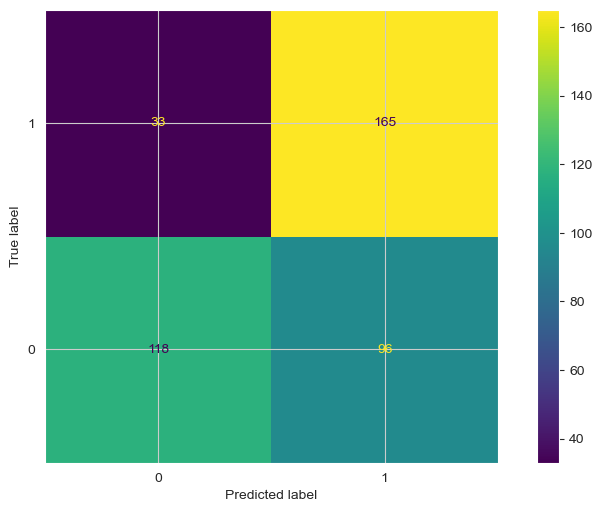

In [31]:
cfm = confusion_matrix(y_test, preds_ann)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
plt.show()

In [34]:
from sklearn.linear_model import SGDClassifier

In [36]:
lr_sgd = SGDClassifier(loss="log")
lr_sgd.fit(X_train, y_train)

SGDClassifier(loss='log')

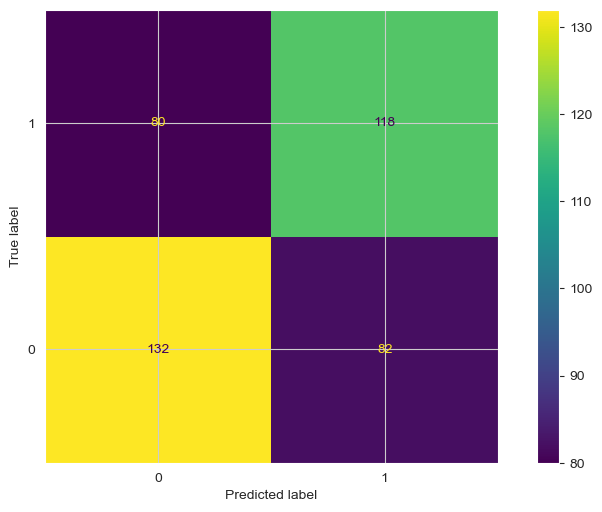

In [38]:
sgd_pred = lr_sgd.predict(X_test)
cfm = confusion_matrix(y_test, sgd_pred)
display = ConfusionMatrixDisplay(cfm)
display.plot()
plt.gca().invert_yaxis()
plt.show()